<a href="https://colab.research.google.com/github/praveenkumarbalakrishnan/tasks/blob/main/SIG731_Data_Wrangling_Task6HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Task 6HD: SIG731-Data Wrangling

**Name:** Praveenkumar Balakrishnan

**Student Number:** 223029369

**Email Address:** s223029369@deakin.edu.au

# Import Statements

In [1]:
from functools import reduce
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tasks

## Task 1

Download at least five different datasets that are part of the NHANES 2017–2020 study, see https:
//wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020. Merge them into a single data frame.

Downloaded 5 dataframes and merged into a single dataframe, this analysis is to find the relationship of demographic, diet, body measure, cholestrol and cardiovascular health of male and female on or above 40 years

In [2]:
dg_df = pd.read_sas("/content/drive/MyDrive/Inputs/P_DEMO.XPT")
diet_df = pd.read_sas("/content/drive/MyDrive/Inputs/P_DSQTOT.XPT")
bm_df = pd.read_sas("/content/drive/MyDrive/Inputs/P_BMX.XPT")
cl_df = pd.read_sas("/content/drive/MyDrive/Inputs/P_TCHOL.XPT")
cvh_df = pd.read_sas("/content/drive/MyDrive/Inputs/P_CDQ.XPT")

dataframes = [dg_df, diet_df, bm_df, cl_df, cvh_df]

master_data_df = reduce(
    lambda x, y: pd.merge(x, y, on='SEQN', how='inner'), dataframes)
master_data_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010
0,109271.0,66.0,2.0,1.0,49.0,NaN,3.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1,109274.0,66.0,2.0,1.0,68.0,NaN,5.0,7.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,109282.0,66.0,2.0,1.0,76.0,NaN,3.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
3,109284.0,66.0,2.0,2.0,44.0,NaN,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,109290.0,66.0,2.0,2.0,68.0,NaN,4.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [3]:
master_data_df.shape

(5949, 106)

## Task 2

Create atleast five nontrivial data visualisations and/or tables.

Drop the columns if more than 60% of the value in the column is null which cannot be used for analysis because of the unavailability of data

In [4]:
master_data_df['TOTAL_COUNT'] = master_data_df.shape[1]
columns_to_drop = []
for col in master_data_df.columns:
  if master_data_df[col].count() / master_data_df.shape[0] < 0.4:
    print(
        str(round((1 - (master_data_df[col].count() / master_data_df.shape[0]))
        * 100, 2)) + f"% of the values in the Column {col} is NaN")
    columns_to_drop.append(col)

100.0% of the values in the Column RIDAGEMN is NaN
69.94% of the values in the Column DMDYRUSZ is NaN
94.1% of the values in the Column RIDEXPRG is NaN
75.09% of the values in the Column DSQTKCAL is NaN
95.46% of the values in the Column DSQTPROT is NaN
83.71% of the values in the Column DSQTCARB is NaN
91.76% of the values in the Column DSQTSUGR is NaN
97.23% of the values in the Column DSQTFIBE is NaN
84.92% of the values in the Column DSQTTFAT is NaN
97.63% of the values in the Column DSQTSFAT is NaN
98.4% of the values in the Column DSQTMFAT is NaN
95.41% of the values in the Column DSQTPFAT is NaN
91.11% of the values in the Column DSQTCHOL is NaN
87.46% of the values in the Column DSQTLYCO is NaN
86.15% of the values in the Column DSQTLZ is NaN
71.47% of the values in the Column DSQTVB1 is NaN
71.47% of the values in the Column DSQTVB2 is NaN
69.39% of the values in the Column DSQTNIAC is NaN
67.15% of the values in the Column DSQTVB6 is NaN
67.81% of the values in the Column DSQ

In [5]:
master_data_df = master_data_df.drop(columns=columns_to_drop)
master_data_df.shape

(5949, 46)

Based on the selected data we are trying to find the relationship between the respondents demographic, diet, body measure, cholestrol and cardiovascular health. Selected the further relevant column for the analysis

**Selected Columns:**

SEQN - Respondent sequence number

RIAGENDR - Gender of the participant(Categorical)

RIDAGEYR - Age in years at screening(Numerical)

RIDRETH3 - Recode of reported race and Hispanic origin information, with Non-Hispanic Asian Category(Categorical)

RIDEXMON - Six month time period when the examination was performed - two categories: November 1 through April 30, May 1 through October 31(Categorical)

DMDBORN4 - In what country {were you/was SP} born?(Categorical)

DMDEDUC2 - What is the highest grade or level of school {you have/SP has} completed or the highest degree {you have/s/he has} received?(Categorical)

DMDMARTZ - Marital status(Categorical)

INDFMPIR - A ratio of family income to poverty guidelines(Numerical)

DSDCOUNT - Total # of Dietary Supplements Taken(Numerical)

DSDANCNT - Total # of Antacids Taken(Numerical)

DSD010 - Any Dietary Supplements Taken(Categorical)

DSD010AN - Any Antacids Taken(Categorical)

DSQTVD - Vitamin D (D2 + D3) in mcg(Numerical)

DSQTCALC - Calcium in mg(Numerical)

BMXWT - Weight in kg(Numerical)

BMXHT - Standing Height in cm(Numerical)

BMXBMI - Body Mass Index kg/m**2(Numerical)

BMXLEG - Upper Leg Length in cm(Numerical)

BMXARML - Upper Arm Length in cm(Numerical)

BMXARMC - Arm Circumference in cm(Numerical)

BMXWAIST - Waist Circumference in cm(Numerical)

BMXHIP - Hip Circumference in cm(Numerical)

LBDTCSI - Total Cholesterol in mmol/L(Numerical)

CDQ001 - SP ever had pain or discomfort in chest(Categorical)

CDQ010 - Shortness of breath on stairs/inclines(Categorical)


**Dropping the below columns which are not related to the analysis:**

SDDSRVYR is to indicate the data release cycle 

RIDSTATR is to indicate the interview and examination status of the participant

RIDRETH1 is to indicate reported race and Hispanic origin information but we have another variable RIDRETH3 with broader category

SIALANG - Language of the Sample Person Interview Instrument

SIAPROXY - Proxy used in SP Interview

SIAINTRP - Was an interpreter used to conduct the Sample Person (SP) interview

FIALANG - Language of the Family Interview Instrument

FIAPROXY - Proxy used in Family Interview

FIAINTRP - Interpreter used in Family Interview

MIALANG - Language of the MEC CAPI Interview Instrument

MIAPROXY - Was a Proxy respondent used in conducting the MEC CAPI Interview

MIAINTRP - Was an interpreter used to conduct the MEC CAPI interview

AIALANGA - Language of the MEC ACASI Interview Instrument

WTINTPRP - Full sample interview weight

WTMECPRP - Full sample MEC exam weight

SDMVPSU - Masked variance unit pseudo-PSU variable for variance estimation

SDMVSTRA - Masked variance unit pseudo-stratum variable for variance estimation

BMDSTATS - Body Measures Component Status Code

LBXTC - Total Cholesterol in mg/dL, another scale of total cholestrol is been used


Selected columns for further analysis

In [6]:
key_cols = ['SEQN']
categorical_cols = [
    'RIAGENDR', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDEDUC2', 'DMDMARTZ',
    'DSD010', 'DSD010AN', 'CDQ001', 'CDQ010']
numerical_cols = ['RIDAGEYR', 'INDFMPIR', 'DSDCOUNT', 'DSDANCNT', 'DSQTVD',
                  'DSQTCALC', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 
                  'BMXARMC', 'BMXWAIST', 'BMXHIP', 'LBDTCSI']
data_df = master_data_df[[*key_cols, *numerical_cols, *categorical_cols]]
data_df.head()

,SEQN,RIDAGEYR,INDFMPIR,DSDCOUNT,DSDANCNT,DSQTVD,DSQTCALC,BMXWT,BMXHT,BMXBMI,...,RIAGENDR,RIDRETH3,RIDEXMON,DMDBORN4,DMDEDUC2,DMDMARTZ,DSD010,DSD010AN,CDQ001,CDQ010
0,109271.0,49.0,NaN,1.0,5.397605e-79,NaN,1200.00,98.8,182.3,29.7,...,1.0,3.0,2.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0
1,109274.0,68.0,1.20,1.0,5.397605e-79,NaN,NaN,103.7,185.3,30.2,...,1.0,7.0,1.0,1.0,4.0,3.0,1.0,2.0,2.0,2.0
2,109282.0,76.0,3.61,3.0,1.000000e+00,4.167,135.33,83.3,177.1,26.6,...,1.0,3.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0
3,109284.0,44.0,NaN,1.0,5.397605e-79,16.667,333.33,91.1,152.7,39.1,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
4,109290.0,68.0,5.00,1.0,5.397605e-79,25.000,400.00,73.0,161.2,28.1,...,2.0,4.0,2.0,1.0,5.0,2.0,1.0,2.0,2.0,2.0


### Summary statistics of the numerical columns

RIDAGEYR is age of the respondent, respondent in this analysis are male or female from 40 to 80 years. Mean and median is closer which indicates that the data might me normally/uniformly distributed. Based on the percentile values and std it seems equally spaced.

INDFMPIR is a ratio of family income to poverty guidelines, this ratio in this sample is ranges from 0 to 5, mean is greater than median so the distribution seems like right skewed. Percentile values and std show that only fewer peoples in higher income. only few values are null.

DSDCOUNT & DSDANCNT are the total no of dietary supplements & antacids taken, it ranges from 0 to 99, mean is greater than median so the distribution seems like right skewed. Percentile values and std show that only fewer people took more supplements and antacids. Since the median of antacids taken is 0 it might be more right skewed compared to supplement taken

DSQTVD & DSQTCALC are the Vitamin D & Calcium consumed in mcg, ranges from 0.004 to 2570.00 & 0.740 to 3750.00, mean is greater than median so the distribution seems like right skewed. Percentile values and std show that only fewer people took more vitamins and calcium. Close to 50% of the values are null, may be respondent not consumed vitamin D/calciun or missed during the data collection

BMXWT, BMXHT, BMXBMI, BMXLEG, BMXARML, BMXARMC, BMXWAIST, BMXHIP and LBDTCSI are weight, height, bmi, leg length, arm length, arm circumference, waist circumference, hip circumference and total cholestrol, and their ranges are 
in the below stats summary. In all these variable mean and median are very closer and some are slightly higher which may be little bit right skewed or because of an outliers. only few values are null in these columns.

Rounded off the summary stats to 4 decimal point to exhibit well. 

In [7]:
np.round(data_df[numerical_cols].describe(), 4).T

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,5949.0,60.3132,11.9107,40.000,50.000,60.00,70.00,80.00
INDFMPIR,5115.0,2.6736,1.6257,0.000,1.240,2.32,4.41,5.00
DSDCOUNT,5949.0,1.7887,3.6770,0.000,0.000,1.00,2.00,99.00
DSDANCNT,5949.0,0.2081,2.1808,0.000,0.000,0.00,0.00,99.00
DSQTVD,2654.0,49.8911,106.0665,0.004,13.333,25.00,50.00,2570.00
DSQTCALC,2495.0,327.4095,391.1244,0.740,66.670,208.33,437.50,3750.00
BMXWT,5831.0,83.7422,22.3092,32.600,68.300,80.30,95.50,223.50
BMXHT,5823.0,166.0670,10.1201,131.100,158.600,165.60,173.30,198.30
BMXBMI,5811.0,30.2625,7.2616,14.200,25.400,29.00,33.80,84.40
BMXLEG,5546.0,38.5535,3.8333,25.000,35.900,38.50,41.10,52.50


### Histogram and Boxplot of the numerical columns to find the distribution and outliers

RIDAGEYR is more or less uniformly distributed for the ages from 40 to 80 except mean/median and border values on the right side, there is no outliers

INDFMPIR distribution is right skewed and and more people on the higher family income to poverty ratio, there is no outliers

DSDCOUNT & DSDANCNT are heavily right skewed based on the summary stats and the below plots. Total no of supplements and antacids taken are low in the respondent and we could able to see lot outliers above upper fence

DSQTVD & DSQTCALC are heavily right skewed based on the summary stats and the below plots. Vitamin and Calcium consumptions are low in the respondent and we could able to see lot of outliers in calcium and vitamin consumption

BMXWT, BMXBMI, BMXARMC, BMXWAIST, BMXHIP are right skewed with lot of outliers

BMXHT, BMXLEG, BMXARML are normally distributed with few outliers.

LBDTCSI is slightly right skewed with outliers

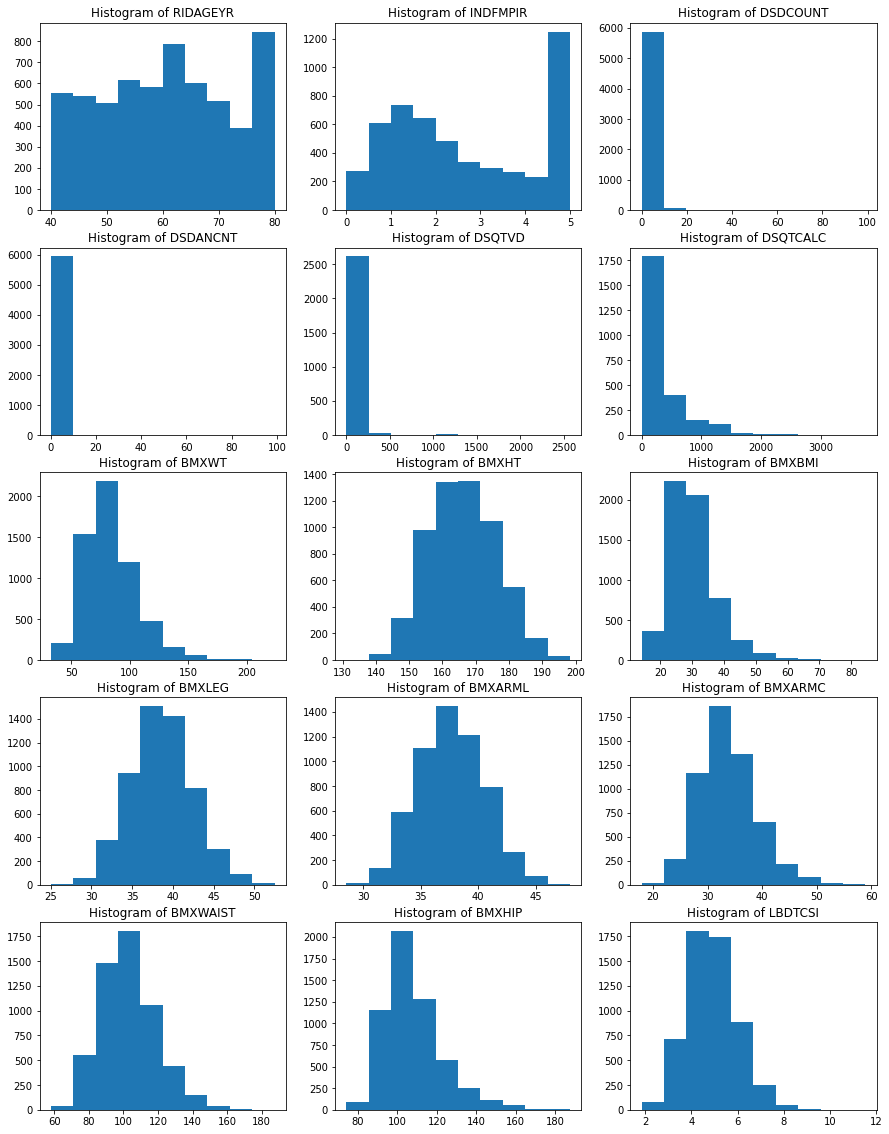

In [12]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
  plt.subplot(5,3,i+1)
  plt.title(f"Histogram of {col}")
  plt.hist(data_df[col])
plt.show()


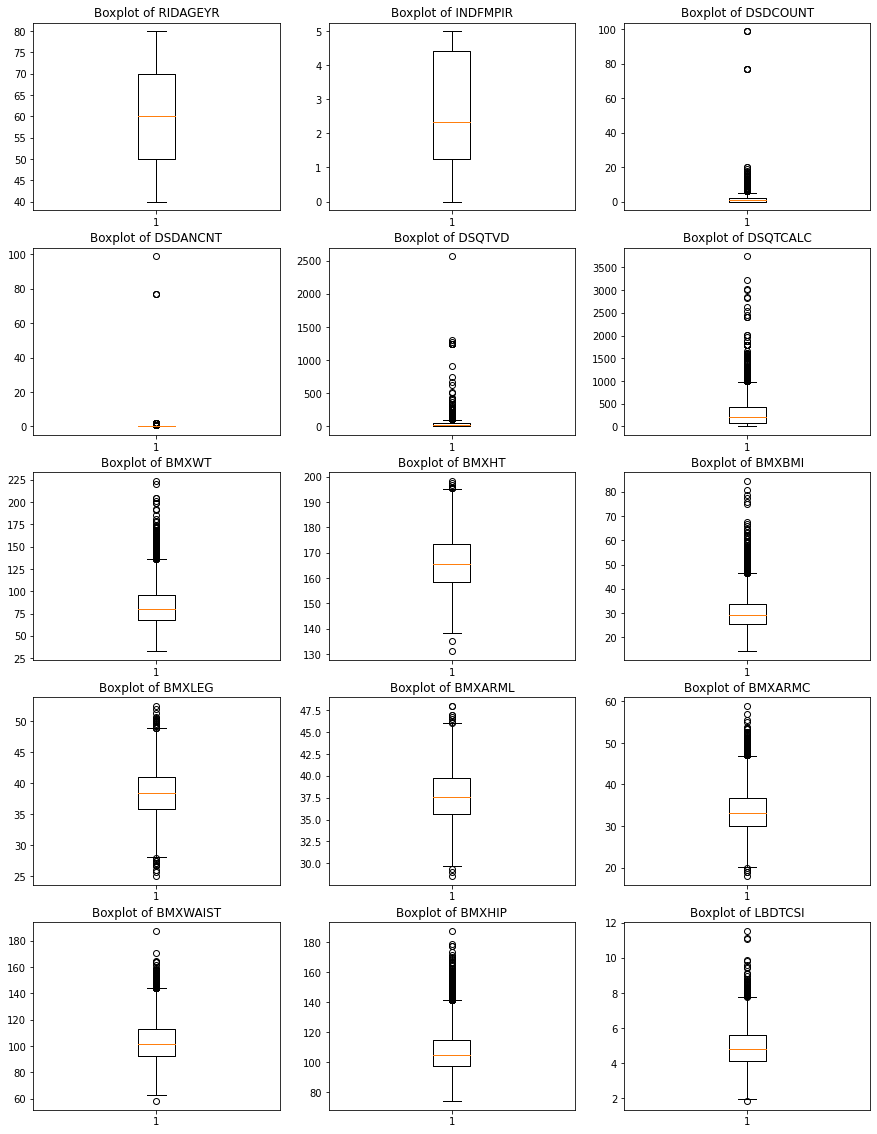

In [18]:
plt.figure(figsize=(15,20))
for i, col in enumerate(numerical_cols):
  plt.subplot(5,3,i+1)
  plt.title(f"Boxplot of {col}")
  plt.boxplot(data_df[col].dropna())
plt.show()
